In [2]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

import os 
import sys 

home = os.path.abspath(
    os.path.join(os.getcwd(), '..', '..', '..'))
pths = [
    os.path.join(home, 'astrobot'), 
    os.path.join(home, 'astrobot', 'tests')]

[sys.path.insert(0, pth) 
 for pth in pths if pth not in sys.path]

from astrobot import bld_stock 

import numpy as np 
import pandas as pd
from pprint import pprint 
import matplotlib.pyplot as plt 
import seaborn as sns
import functools as ft 
reduce = ft.reduce  

def pp(x, *args): pprint(x) if not args else (pprint(x), pp(*args))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# TODO: add to bld_stock 

DATADIR = "C:/users/admin/master/astrobot/resources/rescomstock/resstock"
assert os.path.isdir(DATADIR)
metacom_fpath = os.path.join(DATADIR, "metadata_resstock.tsv")
_comdf = pd.read_csv(metacom_fpath, sep='\t')
_comdf = _comdf.dropna(axis=0, how="any")
comdf = _comdf.copy()

y_lbls = ["eui"] 
X_lbls = ["cz_cat", "cz", "btype_cat", "btype", "weight", "metadata_index", "bldg_id"] 
comdf[["cz_cat", "btype_cat"]] = comdf[["in.ashrae_iecc_climate_zone_2004", "in.geometry_building_type_recs"]]
_kwh_arr, _sqft_arr = comdf["out.site_energy.total.energy_consumption"], comdf["in.sqft"]
comdf[y_lbls[0]] = _kwh_arr / (_sqft_arr / 10.764)  # Convert kWh, ft2 -> kWh/m2

# Integer encoding for cz categories
cz_dict = {cz:i for i, cz in enumerate(np.unique(comdf["cz_cat"]))}
comdf["cz"] = [cz_dict[cz] for cz in comdf["cz_cat"]]
 
# Integer encoding for btype
btype_dict = {bt:i for i, bt in enumerate(np.unique(comdf["btype_cat"]))}
comdf["btype"] = [btype_dict[bt] for bt in comdf["btype_cat"]]

comdf = comdf[X_lbls + y_lbls]
comdf.head(5)

,cz_cat,cz,btype_cat,btype,weight,metadata_index,bldg_id,eui
0,4A,6,Multi-Family with 5+ Units,2,242.131013,0,1,261.339526
1,6B,12,Multi-Family with 2 - 4 Units,1,242.131013,1,2,464.680928
2,3A,3,Multi-Family with 5+ Units,2,242.131013,2,3,309.696571
3,2A,1,Multi-Family with 2 - 4 Units,1,242.131013,3,4,140.524085
4,4A,6,Single-Family Attached,3,242.131013,4,5,62.699874


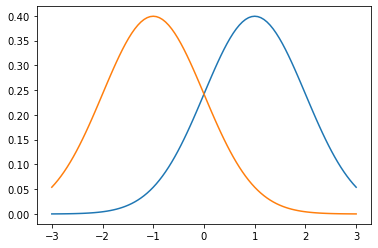

In [7]:
# Make test gaussian mixture model

import scipy.stats as stats 

dists = [stats.norm(loc=1, scale=1),
         stats.norm(loc=-1, scale=1)]

x = np.linspace(-3, 3, 100)
plt.plot(x, dists[0].pdf(x));
plt.plot(x, dists[1].pdf(x));
